<a href="https://colab.research.google.com/github/TokyoProgramming/Cancer_Predict/blob/main/cancer_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.text.all import *
from fastai.text.all import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/gdrive')

     |████████████████████████████████| 727kB 2.9MB/s 
     |████████████████████████████████| 204kB 13.9MB/s 
     |████████████████████████████████| 1.2MB 13.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split


In [3]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
dep_var = 'diagnosis'
procs = [Categorify, FillMissing, Normalize]
train_idx, test_idx = train_test_split(range(len(cancer)), test_size = 0.3)
cont_names, cat_names = cont_cat_split(cancer, max_card = 50, dep_var = dep_var)

In [13]:
len(train_idx), len(test_idx)

(398, 171)

In [15]:
train = cancer.iloc[train_idx]
test = cancer.iloc[test_idx]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
855138,M,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.02239,0.03049,0.012620,0.01377,0.003187,15.53,26.02,107.30,740.4,0.1610,0.4225,0.50300,0.22580,0.2807,0.10710
853401,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,0.8307,1.4660,5.574,105.00,0.006248,0.03374,0.05196,0.011580,0.02007,0.004560,23.15,34.01,160.50,1670.0,0.1491,0.4257,0.61330,0.18480,0.3444,0.09782
866714,B,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,0.2005,0.8163,1.973,15.24,0.006773,0.02456,0.01018,0.008094,0.02662,0.004143,13.34,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241
868223,B,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,0.4489,2.5080,3.258,34.37,0.006578,0.01380,0.02662,0.013070,0.01359,0.003707,13.33,25.48,86.16,546.7,0.1271,0.1028,0.10460,0.06968,0.1712,0.07343
857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.01030,0.01603,0.009222,0.01095,0.001629,18.10,31.69,117.70,1030.0,0.1389,0.2057,0.27120,0.15300,0.2675,0.07873


In [185]:
cont_names, cat_names

(['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'perimeter_se',
  'area_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fractal_dimension_worst'],
 [])

In [16]:
dls = TabularDataLoaders.from_df(train, y_names='diagnosis', cat_names= cat_names ,cont_names=cont_names, procs= procs, bs=64)

In [17]:
dls.show_batch()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,14.810000,14.700000,94.660004,680.700013,0.08472,0.05016,3.416000e-02,2.541000e-02,0.1659,0.05348,0.2182,0.6232,1.677000,20.719999,0.006708,0.01197,1.482000e-02,1.056000e-02,0.01580,0.001779,15.610000,17.580000,101.699997,760.200014,0.11390,0.10110,1.101000e-01,7.955000e-02,0.2334,0.06142,B
1,14.440000,15.180000,93.970001,640.099977,0.09970,0.10210,8.487000e-02,5.532000e-02,0.1724,0.06081,0.2406,0.7394,2.120000,21.200001,0.005706,0.02297,3.114000e-02,1.493000e-02,0.01454,0.002528,15.850000,19.850000,108.599998,766.900024,0.13160,0.27350,3.103000e-01,1.599000e-01,0.2691,0.07683,B
2,7.760000,24.540001,47.919998,181.000014,0.05263,0.04362,-3.698972e-09,-1.226902e-09,0.1587,0.05884,0.3857,1.4280,2.548000,19.150000,0.007189,0.00466,9.248786e-10,-1.633556e-10,0.02676,0.002783,9.456000,30.370001,59.160002,268.600020,0.08996,0.06444,8.994718e-09,-2.735622e-09,0.2871,0.07039,B
3,13.050000,18.590000,85.089996,512.000004,0.10820,0.13040,9.603000e-02,5.603000e-02,0.2035,0.06501,0.3106,1.5100,2.590000,21.570000,0.007807,0.03932,5.112000e-02,1.876000e-02,0.02860,0.005715,14.190000,24.850000,94.220001,591.200000,0.13430,0.26580,2.573000e-01,1.258000e-01,0.3113,0.08317,B
4,12.560000,19.070000,81.919998,485.799979,0.08760,0.10380,1.030000e-01,4.391000e-02,0.1533,0.06184,0.3602,1.4780,3.212000,27.490000,0.009853,0.04235,6.271000e-02,1.966000e-02,0.02639,0.004205,13.370000,22.430000,89.019997,547.400008,0.10960,0.20020,2.388000e-01,9.265000e-02,0.2121,0.07188,B
5,12.620000,23.969999,81.349999,496.399994,0.07903,0.07529,5.438000e-02,2.036000e-02,0.1514,0.06019,0.2449,1.0660,1.445000,18.510000,0.005169,0.02294,3.016000e-02,8.691000e-03,0.01365,0.003407,14.200000,31.310000,90.669999,623.999999,0.12270,0.34540,3.911000e-01,1.180000e-01,0.2826,0.09585,B
6,28.110001,18.469999,188.500002,2499.000047,0.11420,0.15160,3.201000e-01,1.595000e-01,0.1648,0.05525,2.8730,1.4760,21.979999,525.599968,0.013450,0.02772,6.389000e-02,1.407000e-02,0.04783,0.004476,28.110001,18.469999,188.500001,2498.999990,0.11420,0.15160,3.201000e-01,1.595000e-01,0.1648,0.05525,M
7,20.549999,20.860001,137.800002,1307.999989,0.10460,0.17390,2.085000e-01,1.322000e-01,0.2127,0.06251,0.6986,0.9901,4.706000,87.780000,0.004578,0.02616,4.005000e-02,1.421000e-02,0.01948,0.002689,24.299999,25.480000,160.199997,1808.999982,0.12680,0.31350,4.433000e-01,2.148000e-01,0.3077,0.07569,M
8,17.190001,22.070000,111.599999,928.299999,0.09726,0.08995,9.061000e-02,6.527000e-02,0.1867,0.05580,0.4203,0.7383,2.819000,45.419998,0.004493,0.01206,2.048000e-02,9.875000e-03,0.01144,0.001575,21.580000,29.330000,140.500000,1435.999998,0.15580,0.25670,3.889000e-01,1.984000e-01,0.3216,0.07570,M
9,23.270001,22.040001,152.100005,1686.000004,0.08439,0.11450,1.324000e-01,9.702000e-02,0.1801,0.05553,0.6642,0.8561,4.603000,97.849998,0.004910,0.02544,2.822000e-02,1.623000e-02,0.01956,0.003740,28.010001,28.219999,184.199998,2403.000005,0.12280,0.35830,3.948000e-01,2.346000e-01,0.3589,0.09187,M


In [18]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.0005754399462603033)

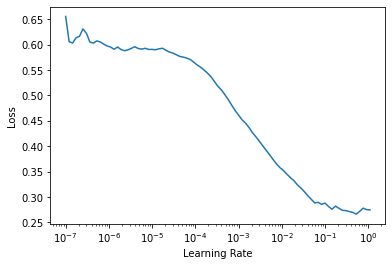

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.490062,0.513048,0.974684,00:00
1,0.345741,0.402339,0.962025,00:00


In [21]:
row, clas, probs = learn.predict(cancer.iloc[4])

In [22]:
row['diagnosis'][0]

1.0

In [24]:

import seaborn as sn
import matplotlib.pyplot as plt

pre_arr = []
ans_arr = []

def check_model(data, target_col):

  size = len(data)

  for k in range(size):
    row, clas, probs = learn.predict(data.iloc[k])
    res = row[target_col][0]
    ans = data[target_col].values[k]
    if(ans == 'M'):
      ans = 1.0
    elif(ans == 'B'):
      ans = 0.0

    pre_arr.append(res)
    ans_arr.append(ans)
    
  # create confusion matrix from result
  res_data = list(zip(ans_arr, pre_arr))
  res_table = pd.DataFrame(res_data, columns = ['actual', 'predict'])
  confusion_matrix = pd.crosstab(res_table['actual'], res_table['predict'], rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()
  return confusion_matrix

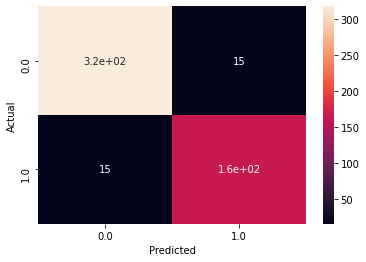

Predicted,0.0,1.0
Actual,,
0.0,318,15
1.0,15,165


In [27]:
check_model(test, 'diagnosis')